In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

from citipy import citipy

# Import weather_api_key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitude and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates :
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    # If city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

643

In [5]:
# Bulding the basic url for the OpenWeatherMap
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval          ")
print("----------------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count += 1
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into the city_data list.
        city_data.append({"City": city.title() ,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that data loading is complete.
print("----------------------------------")
print("Data Retrieval Complete           ")
print("----------------------------------")

Beginning Data Retrieval          
----------------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | vestmanna
Processing Record 3 of Set 1 | mount isa
Processing Record 4 of Set 1 | gornopravdinsk
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | asyut
Processing Record 7 of Set 1 | meulaboh
Processing Record 8 of Set 1 | saint george
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | chuy
Processing Record 11 of Set 1 | east london
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | pestravka
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | luderitz
Processing Record 17 of Set 1 | ploemeur
Processing Record 18 of Set 1 | khatanga
Processing Record 19 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 20 of Set 1 | marv dasht
City not found. Skipping...
Processing Record 21 of Set 1 | codri

Processing Record 189 of Set 4 | marystown
Processing Record 190 of Set 4 | nanortalik
Processing Record 191 of Set 4 | jizan
Processing Record 192 of Set 4 | kamenka
Processing Record 193 of Set 4 | xichang
Processing Record 194 of Set 4 | geraldton
Processing Record 195 of Set 4 | pryazha
Processing Record 196 of Set 4 | newport
Processing Record 197 of Set 4 | belaya gora
Processing Record 198 of Set 4 | ostrovnoy
Processing Record 199 of Set 4 | ordzhonikidze
Processing Record 200 of Set 4 | dawei
Processing Record 201 of Set 4 | stara synyava
Processing Record 202 of Set 4 | kodinsk
Processing Record 203 of Set 4 | sao filipe
Processing Record 205 of Set 5 | taburi
City not found. Skipping...
Processing Record 206 of Set 5 | malwan
City not found. Skipping...
Processing Record 207 of Set 5 | labuhan
Processing Record 208 of Set 5 | camalu
Processing Record 209 of Set 5 | birecik
Processing Record 210 of Set 5 | bathsheba
Processing Record 211 of Set 5 | hermiston
Processing Record

Processing Record 378 of Set 8 | marolambo
Processing Record 379 of Set 8 | weligama
Processing Record 380 of Set 8 | faya
Processing Record 381 of Set 8 | yulara
Processing Record 382 of Set 8 | grande-synthe
Processing Record 383 of Set 8 | kalemie
Processing Record 384 of Set 8 | siavonga
Processing Record 385 of Set 8 | nuevo progreso
Processing Record 386 of Set 8 | sao jose da coroa grande
Processing Record 387 of Set 8 | ca mau
Processing Record 388 of Set 8 | great bend
Processing Record 389 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 390 of Set 8 | alofi
Processing Record 391 of Set 8 | louis trichardt
Processing Record 392 of Set 8 | kyshtovka
Processing Record 393 of Set 8 | marrakesh
Processing Record 394 of Set 8 | qalyub
Processing Record 395 of Set 8 | sataua
City not found. Skipping...
Processing Record 396 of Set 8 | luwuk
Processing Record 397 of Set 8 | hay river
Processing Record 398 of Set 8 | hunza
City not found. Skipping...
Pr

Processing Record 562 of Set 12 | vredendal
Processing Record 563 of Set 12 | kuruman
Processing Record 564 of Set 12 | sept-iles
Processing Record 565 of Set 12 | freeport
Processing Record 566 of Set 12 | goderich
Processing Record 567 of Set 12 | bom jesus
Processing Record 568 of Set 12 | jemnice
Processing Record 569 of Set 12 | hobyo
Processing Record 570 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 571 of Set 12 | thermon
City not found. Skipping...
Processing Record 572 of Set 12 | saint-georges
Processing Record 573 of Set 12 | kautokeino
Processing Record 574 of Set 12 | hokitika
Processing Record 575 of Set 12 | cartagena
Processing Record 576 of Set 12 | paamiut
Processing Record 577 of Set 12 | anadyr
Processing Record 578 of Set 12 | ketchikan
Processing Record 579 of Set 12 | soroti
Processing Record 580 of Set 12 | paraguacu paulista
Processing Record 581 of Set 12 | tabuk
Processing Record 582 of Set 12 | kapustin yar-1
City not found. Skipping...

In [7]:
print(len(city_data))

586


In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.7393,-90.3518,82.36,85,64,8.01,EC,2021-05-24 15:58:50
1,Vestmanna,62.1564,-7.1664,49.12,76,90,9.53,FO,2021-05-24 15:58:50
2,Mount Isa,-20.7333,139.5000,58.77,63,40,0.00,AU,2021-05-24 15:58:50
3,Gornopravdinsk,60.0500,69.9000,61.03,60,99,8.37,RU,2021-05-24 15:58:51
4,Yellowknife,62.4560,-114.3525,37.33,60,1,5.01,CA,2021-05-24 15:54:22
5,Asyut,27.1810,31.1837,89.78,10,0,13.91,EG,2021-05-24 15:55:26
6,Meulaboh,4.1363,96.1285,79.14,87,81,3.76,ID,2021-05-24 15:58:51
7,Saint George,37.1041,-113.5841,69.44,27,0,1.01,US,2021-05-24 15:58:52
8,Rikitea,-23.1203,-134.9692,75.40,83,85,15.52,PF,2021-05-24 15:58:52
9,Chuy,-33.6971,-53.4616,59.68,60,14,15.61,UY,2021-05-24 15:58:52


In [31]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Puerto Ayora,EC,2021-05-24 15:58:50,-0.7393,-90.3518,82.36,85,64,8.01
1,Vestmanna,FO,2021-05-24 15:58:50,62.1564,-7.1664,49.12,76,90,9.53
2,Mount Isa,AU,2021-05-24 15:58:50,-20.7333,139.5000,58.77,63,40,0.00
3,Gornopravdinsk,RU,2021-05-24 15:58:51,60.0500,69.9000,61.03,60,99,8.37
4,Yellowknife,CA,2021-05-24 15:54:22,62.4560,-114.3525,37.33,60,1,5.01
5,Asyut,EG,2021-05-24 15:55:26,27.1810,31.1837,89.78,10,0,13.91
6,Meulaboh,ID,2021-05-24 15:58:51,4.1363,96.1285,79.14,87,81,3.76
7,Saint George,US,2021-05-24 15:58:52,37.1041,-113.5841,69.44,27,0,1.01
8,Rikitea,PF,2021-05-24 15:58:52,-23.1203,-134.9692,75.40,83,85,15.52
9,Chuy,UY,2021-05-24 15:58:52,-33.6971,-53.4616,59.68,60,14,15.61


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

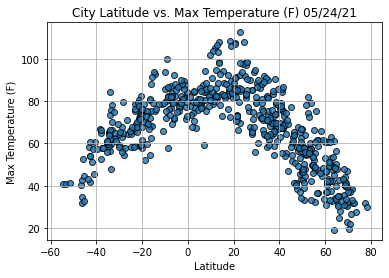

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate other graph properties.
plt.title(f"City Latitude vs. Max Temperature (F) "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

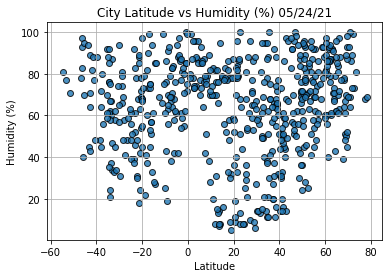

In [17]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate other graph properties.
plt.title(f"City Latitude vs Humidity (%) "+time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

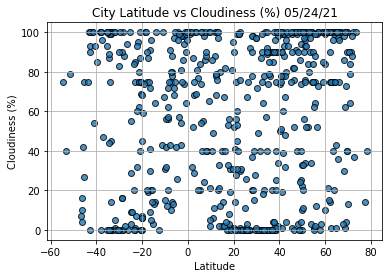

In [18]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate other graph properties.
plt.title(f"City Latitude vs Cloudiness (%) "+time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

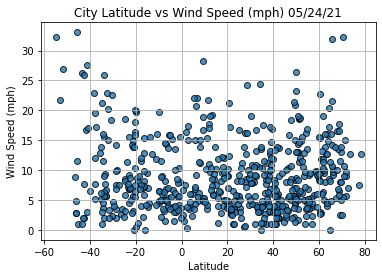

In [21]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate other graph properties.
plt.title(f"City Latitude vs Wind Speed (mph) "+time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

In [85]:
# Import linegress
from scipy.stats import linregress
    
# Create a function to perform libear regression on the weather data and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, str_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = slope * x_values + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()
    
    print(f"r-value : {round(r_value, 2)}")

In [27]:
index13 = city_data_df.loc[13]
index13

City                  New Norfolk
Country                        AU
Date          2021-05-24 15:58:54
Lat                      -42.7826
Lng                       147.059
Max Temp                    53.91
Humidity                       64
Cloudiness                     90
Wind Speed                   1.99
Name: 13, dtype: object

In [34]:
city_data_df.loc[city_data_df["Lat"] >= 0]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Vestmanna,FO,2021-05-24 15:58:50,62.1564,-7.1664,49.12,76,90,9.53
3,Gornopravdinsk,RU,2021-05-24 15:58:51,60.0500,69.9000,61.03,60,99,8.37
4,Yellowknife,CA,2021-05-24 15:54:22,62.4560,-114.3525,37.33,60,1,5.01
5,Asyut,EG,2021-05-24 15:55:26,27.1810,31.1837,89.78,10,0,13.91
6,Meulaboh,ID,2021-05-24 15:58:51,4.1363,96.1285,79.14,87,81,3.76
...,...,...,...,...,...,...,...,...,...
581,Wooster,US,2021-05-24 16:02:19,40.8051,-81.9351,77.88,73,75,5.75
582,Jand,PK,2021-05-24 16:02:19,33.4299,72.0193,88.92,21,0,2.98
583,Uvat,RU,2021-05-24 16:02:19,59.1433,68.8953,61.77,78,85,5.95
584,Tugolesskiy Bor,RU,2021-05-24 16:02:20,55.5505,39.8242,60.48,69,99,4.61


In [35]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

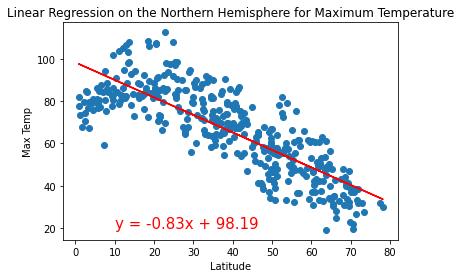

r-value : -0.82


In [86]:
# Linear regression on Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,20))

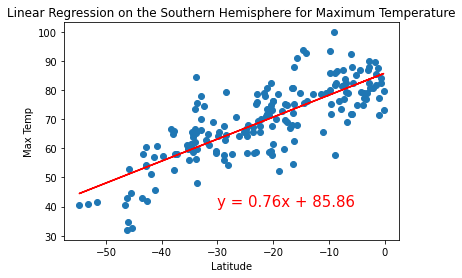

r-value : 0.79


In [87]:
# Linear regression on Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp', (-30,40))

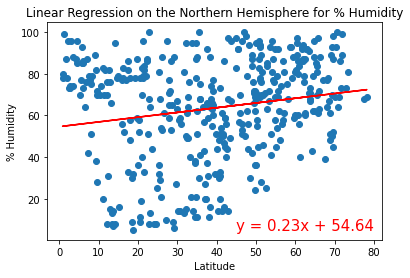

r-value : 0.18


In [88]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity', (45,5))

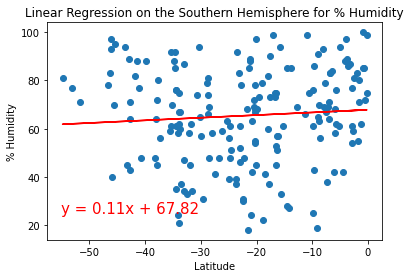

r-value : 0.07


In [89]:
# Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity', (-55,25))

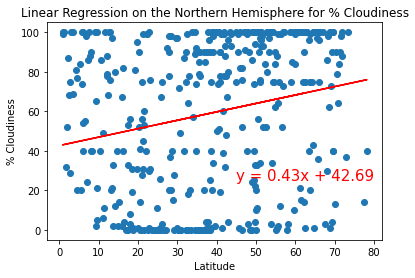

r-value : 0.22


In [91]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness', (45,25))

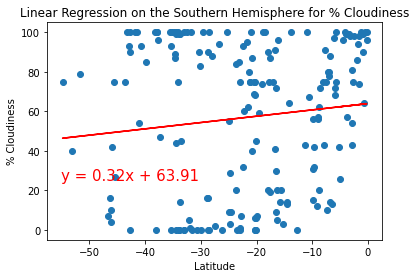

r-value : 0.11


In [93]:
# Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness', (-55,25))

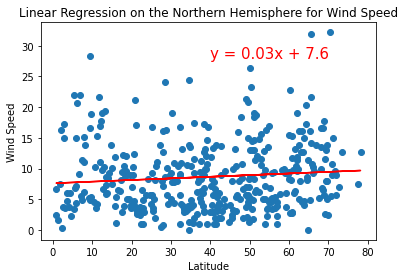

r-value : 0.09


In [99]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed', (40,28))

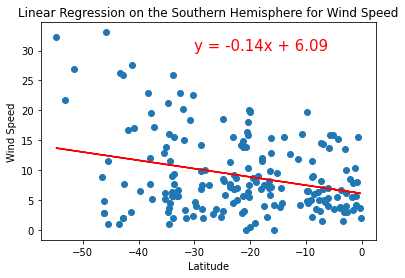

r-value : -0.28


In [104]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-30,30))